In [1]:
from typing import Mapping, Any, Sequence
import copy
import os
import os.path

In [2]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import pathlib
import importlib

In [3]:
import ray
import tensorflow as tf

2024-05-09 14:25:53.518099: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 14:25:53.601199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 14:25:53.602788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 14:25:55.277181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from exps import dataproc

In [6]:
from daaf import estimator_metrics

In [7]:
# files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/evaljob/agg/1713705374/1713706816/logs/*.parquet")
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/evaljob/agg/1715263005/1715264399/logs/*.parquet")

In [8]:
def read_data(files):
    def parse_state_values(sv):
        return np.reshape(
            sv["data"], newshape=sv["shape"]
        )

    with ray.init() as context:
        ds_logs = ray.data.read_parquet(files)
        df_logs = ds_logs.to_pandas()
    df_logs["state_values"] = df_logs["state_values"].apply(parse_state_values)
    return df_logs

In [9]:
df_logs = read_data(files)

2024-05-09 14:26:01,096	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/8 [00:00<?, ?it/s]

Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

Read progress 0:   0%|          | 0/50 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [10]:
df_logs

,episode,exp_id,meta,state_values
0,190,1715263005-63036c13-RedGreenSeq,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","[[-19.80916204739628, -17.15846900836637, -15...."
1,190,1715263005-62c63001-RedGreenSeq,"{'algorithm': 'one-step-td', 'algorithm_args':...","[[-43.92046183252249, -50.5326225834207, -46.3..."
2,190,1715263005-610000df-IceWorld,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","[[-14.827999747368427, -11.283347368421053, -7..."
3,190,1715263005-620823ad-IceWorld,"{'algorithm': 'one-step-td', 'algorithm_args':...","[[-3.4963652196459276, -3.329828339930383, -3...."
4,190,1715263005-621fa01e-IceWorld,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","[[-24.19032434155747, -20.160954699992576, -13..."
...,...,...,...,...
35195,320,1715263005-fe765c36-ABCSeq,"{'algorithm': 'one-step-td', 'algorithm_args':...","[[-60.63560866795348, -54.81887338278657, -49...."
35196,320,1715263005-fe035497-TowerOfHanoi,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","[[-585.2524318287763, -447.4177079856222, -392..."
35197,320,1715263005-fdfb0ab0-FrozenLake-v1,"{'algorithm': 'one-step-td', 'algorithm_args':...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
35198,320,1715263005-fe4244b9-RedGreenSeq,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","[[-22.268445336471185, -20.09385533420391, -15..."


In [11]:
df_logs.iloc[0]["meta"]

{'algorithm': 'nstep-td',
 'algorithm_args': '{}',
 'discount_factor': 0.99,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([-21.2446288 , -18.85810242, -16.39925704, -13.8659012 ,
        -11.25577699,  -8.56655811,  -5.79584775,  -2.94117647,
          0.        ]),
 'env': {'args': '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
  'level': 'NNLHYJFTC5ENMMDZWRNQ37B6VVDXQ7WHB5EJOPXYZFLMJEZOYLTSLB4ID4WHQG57XQPNUHGZCFDCWHYGXWSBW7FBWYRZGAGBW4J7MEQ=',
  'name': 'RedGreenSeq'},
 'epsilon': 0.0,
 'exp_id': '1715263005-63036c13-RedGreenSeq',
 'learning_rate': 0.1,
 'policy_type': 'single-step',
 'reward_period': 1,
 'run_id': 0,
 'traj_mapping_method': 'identity-mapper'}

In [12]:
df_logs.iloc[0]["state_values"]

array([[-19.80916205, -17.15846901, -15.07822161, -13.10162062,
        -11.11065543,  -7.89008745,  -5.64204705,  -3.77681442,
          0.        ],
       [-20.80130241, -18.15388695, -15.95066797, -12.58330711,
        -11.19311473,  -7.55809078,  -5.55615529,  -2.39728152,
          0.        ],
       [-20.09659903, -18.01323126, -15.60486008, -13.13494021,
         -9.75580219,  -7.6048606 ,  -5.73190235,  -2.44412537,
          0.        ],
       [-18.75516043, -15.96808788, -14.15271232, -12.3543663 ,
         -9.64362078,  -7.67929014,  -4.77736684,  -2.09508469,
          0.        ],
       [-19.13063067, -17.23350318, -14.73423066, -12.40770957,
         -9.70660169,  -7.28868384,  -5.00166949,  -2.04525222,
          0.        ]])

In [13]:
def isolate_problem(df, problem: str, level: str, algo: str, gamma: float, reward_period: int):
    def filter_methods(meta): 
        return (
            (meta["env"]["name"] == problem) &
            (meta["env"]["level"] == level) &
            (meta["algorithm"] == algo) &
            (meta["discount_factor"] == gamma) &
            (meta["reward_period"] == reward_period)
        )
    def filter_baseline(meta):
        return (
            (meta["env"]["name"] == problem) &
            (meta["env"]["level"] == level) &
            (meta["algorithm"] == algo) &
            (meta["discount_factor"] == gamma) &
            (meta["traj_mapping_method"] == "identity-mapper") &
            (meta["reward_period"] == 1)
        )
    df_raw = pd.concat(
        [
            copy.deepcopy(df[df["meta"].apply(filter_methods)]),
            copy.deepcopy(df[df["meta"].apply(filter_baseline)])
        ],
        axis=0
    )

    rows = []
    for row in df_raw.to_dict("records"):
        new_row = copy.deepcopy(row)
        del new_row["meta"]
        new_row = dict(new_row, **row["meta"])
        rows.append(new_row)
    df_raw = pd.DataFrame(rows)
    del df_raw["env"]
    exp_columns = [
        col for col in df_raw.columns if col not in set(["state_values", "dyna_prog_state_values"])
    ]
    return df_raw.drop_duplicates(
        subset=exp_columns,
    ).sort_values(["episode", "exp_id"])
    

In [14]:
def plots_value_changes(df_problem: pd.DataFrame):
    # plot per state and traj mapper
    rows = []
    for row in df_problem.to_dict("records"):
        state_values = row["state_values"]
        # shape: (runs x states)
        for run in range(state_values.shape[0]):
            for state in range(state_values.shape[1]):
                new_row = copy.deepcopy(row)
                del new_row["state_values"]
                new_row["run"] = run
                new_row["state"] = state
                new_row["state_value"] = row["state_values"][run, state]
                rows.append(new_row)
    df_methods = pd.DataFrame(rows)

    ref_row = copy.deepcopy(df_methods.iloc[0]).to_dict()
    episodes = df_methods["episode"].unique()
    runs = df_methods["run"].unique()
    for episode in episodes:
        for run in runs:
            for state in range(len(ref_row["dyna_prog_state_values"])):
                ref_row["episode"] = episode
                ref_row["run"] = run
                ref_row["state"] = state
                ref_row["state_value"] = ref_row["dyna_prog_state_values"][state]
                ref_row["traj_mapping_method"] = "dynamic-programming"
                rows.append(copy.deepcopy(ref_row))
    df_plot = pd.DataFrame(rows)
    palette = sns.color_palette("tab10")
    return sns.relplot(
        data=df_plot,
        x="episode", y="state_value",
        hue="traj_mapping_method", col="state",
        kind="line", palette=palette,
        height=5, aspect=.75, facet_kws=dict(sharex=False),
    )

## One-step TD

In [15]:
df_abc_td = isolate_problem(
    df_logs, problem="ABCSeq", level="7",
    algo="one-step-td",
    reward_period=4,
    gamma=1.0
)

In [16]:
df_abc_td.shape

(250, 14)

In [17]:
df_abc_td

,episode,exp_id,state_values,algorithm,algorithm_args,discount_factor,drop_truncated_feedback_episodes,dyna_prog_state_values,epsilon,learning_rate,policy_type,reward_period,run_id,traj_mapping_method
85,0,1715263005-0fceea2e-ABCSeq,"[[0.0, -0.4, -2.4, 0.0, -0.4, -2.2, 0.0, 0.0],...",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,single-step,4,3,daaf-trajectory-mapper
84,0,1715263005-21b6c410-ABCSeq,"[[-1.44, -0.36, -1.08, -1.84, -0.4, -0.72, -0....",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,single-step,4,4,daaf-lsq-reward-attribution-mapper
86,0,1715263005-a0875722-ABCSeq,"[[-0.4, -1.12, 0.0, -1.12, -1.12, 0.0, -0.8, 0...",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,options,4,0,daaf-mdp-with-options-mapper
221,0,1715263005-bc83cde9-ABCSeq,"[[-0.19, -0.9999999999999999, -0.82, -0.1, -0....",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,single-step,1,2,identity-mapper
87,0,1715263005-deb09c2d-ABCSeq,"[[-0.36, -0.72, -2.52, -1.44, -1.12, -1.08, -1...",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,single-step,4,4,daaf-impute-missing-reward-mapper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,490,1715263005-0fceea2e-ABCSeq,"[[-184.2275547627881, -168.00976950574454, -14...",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,single-step,4,0,daaf-trajectory-mapper
72,490,1715263005-21b6c410-ABCSeq,"[[-44.32532817580987, -36.053428897770765, -28...",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,single-step,4,0,daaf-lsq-reward-attribution-mapper
74,490,1715263005-a0875722-ABCSeq,"[[-68.52090593819865, -64.48037932133991, -54....",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,options,4,4,daaf-mdp-with-options-mapper
218,490,1715263005-bc83cde9-ABCSeq,"[[-44.05348390668802, -39.67905217710317, -34....",one-step-td,{},1.0,False,"[-48.99999993362666, -41.99999998952205, -34.9...",0.0,0.1,single-step,1,4,identity-mapper


In [18]:
df_abc_td["traj_mapping_method"].unique()

array(['daaf-trajectory-mapper', 'daaf-lsq-reward-attribution-mapper',
       'daaf-mdp-with-options-mapper', 'identity-mapper',
       'daaf-impute-missing-reward-mapper'], dtype=object)

In [19]:
df_abc_td["state_values"].iloc[0].shape

(5, 8)

/tmp/ipykernel_3266377/3725396169.py:31: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  return sns.relplot(


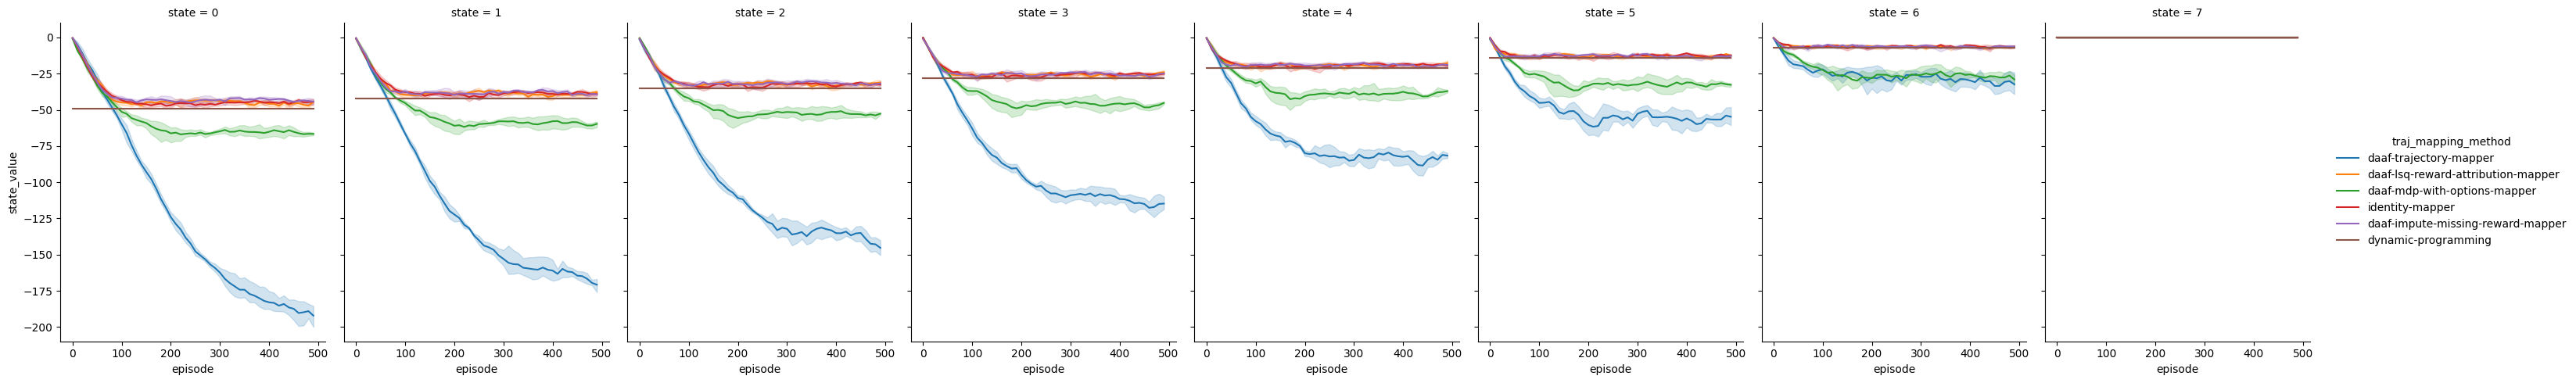

In [20]:
plots_value_changes(df_abc_td)

## Monte Carlo

In [21]:
df_abc_mc = isolate_problem(
    df_logs, problem="ABCSeq", level="7",
    algo="first-visit-mc",
    reward_period=4,
    gamma=1.0
)

In [22]:
df_abc_mc["traj_mapping_method"].unique()

array(['daaf-impute-missing-reward-mapper', 'daaf-trajectory-mapper',
       'identity-mapper', 'daaf-mdp-with-options-mapper',
       'daaf-lsq-reward-attribution-mapper'], dtype=object)

/tmp/ipykernel_3266377/3725396169.py:31: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  return sns.relplot(


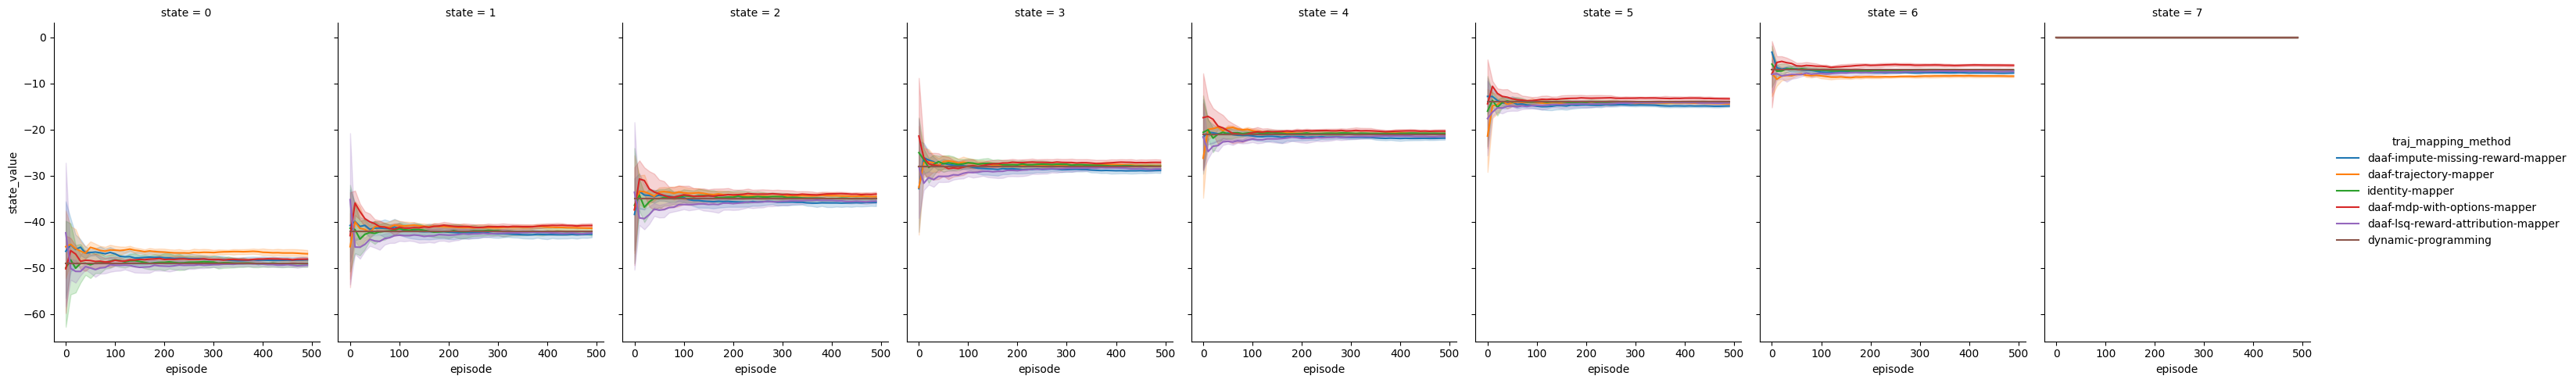

In [23]:
plots_value_changes(df_abc_mc)